# Laboratorium 7 - Detekcja krawędzi, Algorytm Canny'ego


W ramach laboratorium zostanie zaimplementowany jeden z najbardziej znanych algorytmów detekcji krawędzi - Algorytm Canny'ego.
Zacznijmy od importu przydatnych bibliotek oraz wygenerowania syntetycznego obrazu.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import color
from skimage import feature
from scipy import ndimage as nd
import queue
%matplotlib inline

y_size, x_size = 256, 256
image = np.zeros((y_size, x_size))
image[100:200, 100:200] = 1
image = image + np.random.randn(y_size, x_size)*0.02

Algortym Canny'ego jest zaimplementowany w bibliotece skimage.

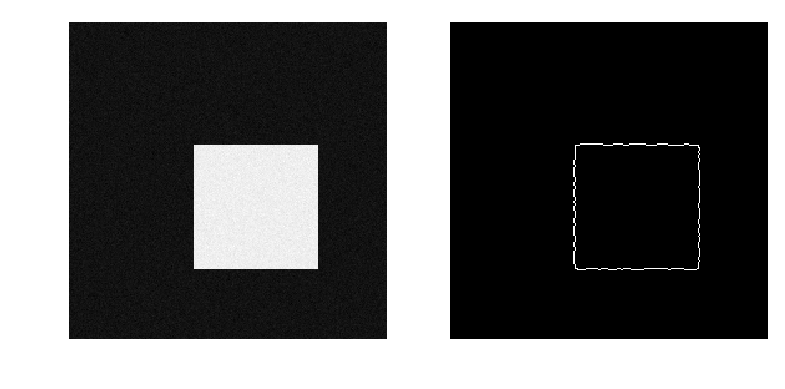

In [2]:
skimage_canny = feature.canny(image)
plt.figure(dpi=150)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(skimage_canny, cmap='gray')
plt.axis('off')
plt.show()


Celem laboratorium jest samodzielna implementacja przedstawionego algorytmu.
Uwaga: wyniki mogą różnić się od przedstawionych powyżej w zależności od przyjętych założeń i wewnętrznej implementacji filtracji Gaussa oraz doboru progu dolnego po algorytmie Otsu.
Szkielet funkcji będzie wyglądać następująco:


In [3]:
def canny(image, sigma=1.0):
    """
    1) Dokonaj filtracji obrazu filtrem Gaussa o zadanej sigmie
    2) Wyznacz przybliżenie gradientu (jego magnitude oraz kąt) za pomocą filtru Sobela
    3) Przeprowadź "non_maximum_supression" korzystając z magnitudy i kąta gradientu, wyznaczając tym samym potencjalnie krawędzie.
    4) Dokonaj podwójnego progowania potencjalnych krawędzi aby wyznaczyć krawędzie silne oraz krawędzie słabe.
    5) Przeproważ histerezę krawędzi, zwróć wynik.
    """
    edges = None
    return None

Powyższa funkcja będzie się składać z następujących podfunkcji:

In [4]:
def gaussian_smoothing(image, sigma):
    """
    TO DO - dokonaj filtracji image za pomoca filtru Gaussa o zadanej sigmie (wielkość filtru według konwencji - zazwyczaj przyjmuje się 2.54*sigma zaokrąglone do najbliższej nieparzystej      wartości w górę, chociaż równie dobrze może to być oddzielny, opcjonalny parametr)
    0.5p
    """
    return np.zeros(image.shape)


In [5]:
def calculate_gradients(image):
    """
    TO DO - Funkcja powinna zwrócić magnitude i kąt gradientu
    0.5p
    """
    gradient_magnitude = np.zeros(image.shape)
    gradient_angle = np.zeros(image.shape)
    return gradient_magnitude, gradient_angle

In [6]:
def non_maximum_supression(gradient_magnitude, gradient_angle):
    """
    TO DO - funkcja powinna wyznaczyć potencjalnie krawędzie korzystając z magntiudy i kąta gradientu
    0.5p
    """
    potential_edges = np.zeros(gradient_magnitude.shape)
    return potential_edges


In [7]:
def otsu_threshold(image):
    """
    TO DO - automatycznie wyznacz próg górny implementująć algorytm Otsu
    0.5p
    """
    threshold = 0
    return threshold

def double_threshold(potential_edges, gradient_magnitude):
    """
    TO DO  - podwójne progowanie wyznaczające krawędzie słabe poraz krawędzie mocne. Wyznacz próg górny korzystajac z otsu_threshold, a próg dolny poprzez podzielenie progu górnego przez 3
    0.5p
    """
    strong_edges = np.zeros(gradient_magnitude.shape)
    weak_edges = np.zeros(gradient_magnitude.shape)
    return strong_edges, weak_edges

In [8]:
def edge_hysteresis(strong_edges, weak_edges):
    """
    TO DO - dokonaj histerezy krawędzi silnych i słabych. Powinny pozostać tylko krawędzie silne oraz te krawędzie słabe, które są połączone z jakąkolwiek krawędzią silną (również przez krawędź słabą)
    0.5p
    Wskazówka: Funkcja będzie niemal identyczna z algorytmem rozrostu obszarów w wersji lokalnej z poprzedniego laboratorium
    """
    edges = np.zeros(strong_edges)
    return edges

Finalnie korzystając z powyższych funkcji zaimplementuj funkcję canny:

In [9]:
def canny(image, sigma=1.0):
    edges = None
    return None

Porównaj działanie zaimplementowanej funkcji na wygenerowanym oraz wczytanym obrazie:

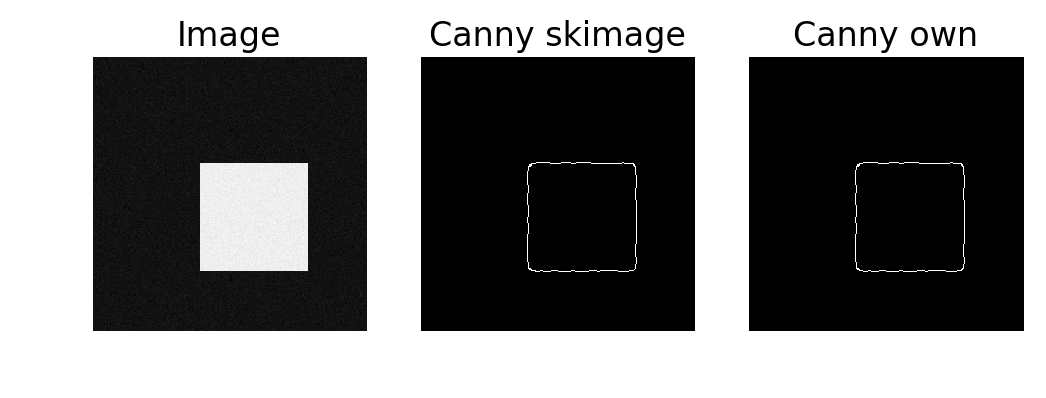

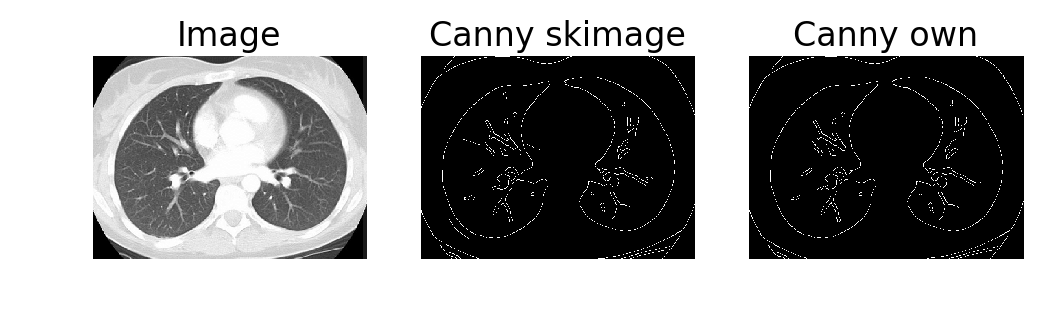

In [11]:
images = [image, color.rgb2gray(io.imread("CT_Lungs.png"))] 
# Krawędzie mają grubość jednego pixela, nie wszystkie muszą być widoczne (ustawienia wyświetlania). Aby zobaczyć wszystkie krawędzie zwiększ dpi rysunku.
for current_image in images:
    skimage_canny = feature.canny(current_image, sigma=3)
    own_canny = canny(current_image, sigma=3)
    plt.figure(dpi=200)
    plt.subplot(1, 3, 1)
    plt.imshow(current_image, cmap='gray')
    plt.title("Image")
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(skimage_canny, cmap='gray')
    plt.title("Canny skimage")
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(own_canny, cmap='gray')
    plt.title("Canny own")
    plt.axis('off')
    plt.show()

Wyniki poszczególnych etapów zostały zaprezentowane poniżej:

Filtracja Gauss (sigma=3):

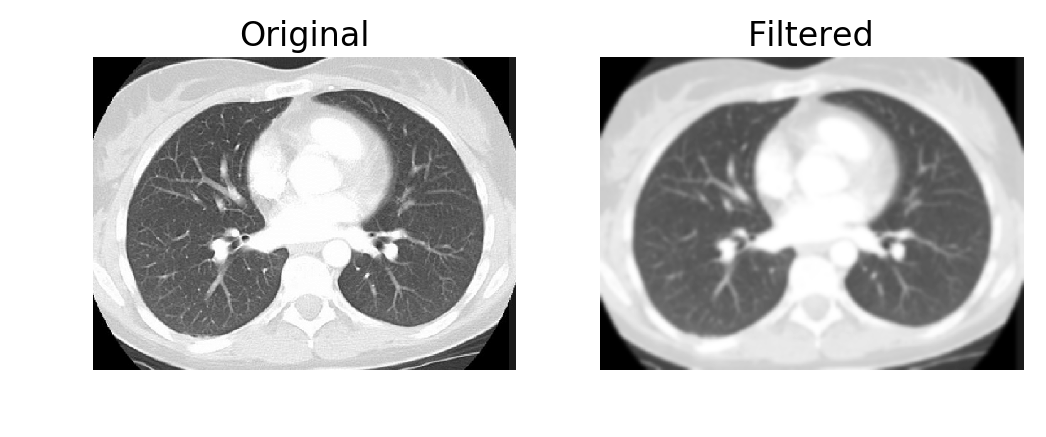

Magnituda/kąt gradientu:

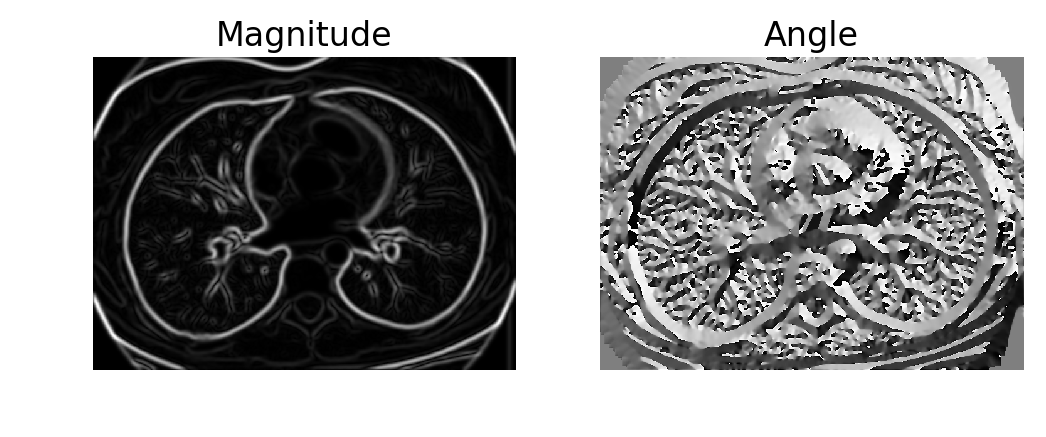

Non-maximum supression:

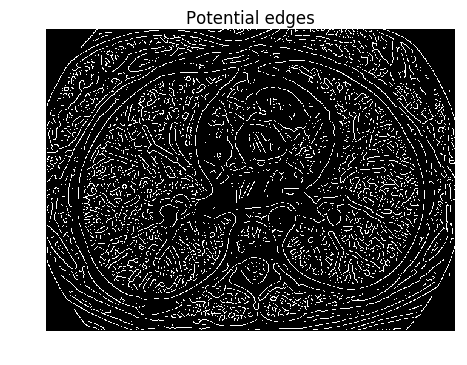

Podwójne progowanie:

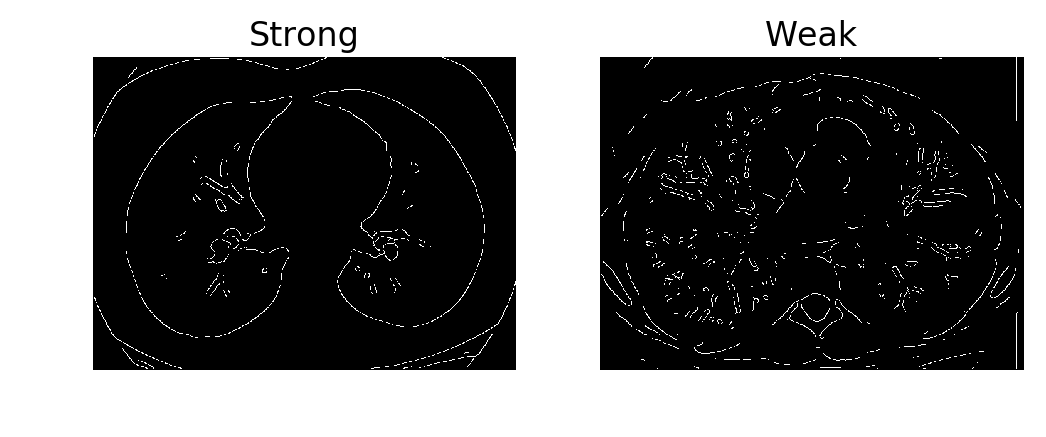

Histereza krawędzi:

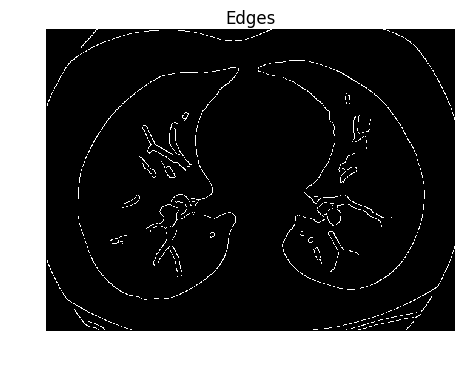